# IMT 573 - Problem Set 5 - Descriptive Data Analysis

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

5. Partial credit will be awarded for each question for which a serious attempt at finding an answer has been shown. Students are *strongly* encouraged to attempt each question and document their reasoning process even if they cannot find the correct answer. 

6. After completing the assignment, ensure that your code can run from start to finish without issue. Restart the kernal and run all cells to double check.

Name: Steve Gonzales Collaborators: None 

For this assignment, you'll need (at least) the following packages. If the package does not load, be sure it is properly installed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In a previous lab, we examined data from [an article](https://fivethirtyeight.com/features/women-in-comic-books/) published on fivethirtyeight.com where the authors discuss gender representation in comic books. The data also contains a host of other information about comic book superheros and villans. For this assignment, we will use the same dataset.

The data is split across the two major comic book publishers in the US - DC and Marvel. The urls for each are below. Use these to import the data for each of the publishers into separate dataframes and then combine the two into a larger dataframe.

In [2]:
url_dc = "https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv"
url_marvel = "https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv"

In [3]:
dc_data = pd.read_csv(url_dc)
marvel_data = pd.read_csv(url_marvel)

In [4]:
data_all = pd.concat([dc_data, marvel_data])
display(data_all.head(3))
print([x for x in data_all.columns])

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Year
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,NaN
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,NaN
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,NaN


['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'YEAR', 'Year']


### Problem 1: Recreate the bar graph

Use the provided data to create a visualization similar to the one titled "Good Girls Gone Meh" in the [article](https://fivethirtyeight.com/features/women-in-comic-books/) but for all the data (i.e. not split by DC and Marvel). Ensure that:

- your visualization shows the percentages for each group
- your visualization's colors and axis labels align with the original

In [5]:
df = data_all.copy()

In [6]:
# Checking to see how many of the non binary characters there are
df['SEX'].value_counts()

SEX
Male Characters           16421
Female Characters          5804
Agender Characters           45
Genderless Characters        20
Genderfluid Characters        2
Transgender Characters        1
Name: count, dtype: int64

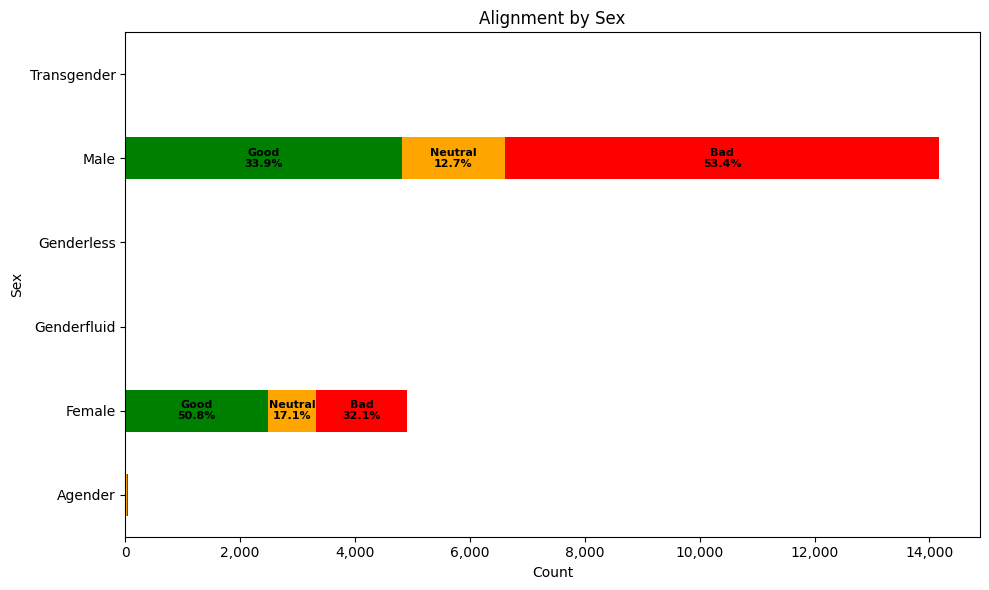

In [7]:
# Create a mapping for a cleaner look
alignment_mapping = {
    'Good Characters': 'Good',
    'Neutral Characters': 'Neutral',
    'Reformed Criminals': 'Reformed',
    'Bad Characters': 'Bad',
}
# Define colors for each alignment
alignment_colors = {
    'Good': 'green',
    'Neutral': 'orange', 
    'Reformed': 'blue',
    'Bad': 'red',    
}
df['sex'] = df['SEX'].str.replace(' Characters', '', regex=False)
df['alignment'] = df['ALIGN'].map(alignment_mapping)

# Put them in the desired order
alignment_order = ['Good', 'Neutral', 'Bad', 'Reformed']

# Create align_counts, ensuring the columns are in the correct order
align_counts = df.groupby(['sex', 'alignment']).size().unstack(fill_value=0)[alignment_order]

# Get the color list in the desired order
color_order = [alignment_colors[align] for align in align_counts.columns]

# Get the color list in the correct order for the plot
color_order = [alignment_colors[align] for align in align_counts.columns]
# Create the axis
ax = align_counts.plot(kind='barh', stacked=True, figsize=(10, 6), color=color_order)
# Set the labels
plt.xlabel('Count')
plt.ylabel('Sex')
plt.title('Alignment by Sex')

# Put commas in the x labels
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.get_legend().remove()
# Iterate over each bar segment and put the Alignment and % in the segment
for i in range(len(align_counts.index)):
    bottom = 0
    for j, alignment in enumerate(align_counts.columns):
        total = align_counts.iloc[i].sum()  # Get the total count for the current sex
        width = align_counts.iloc[i, j]
        if width > 100:
            percentage = (width / total) * 100  # Calculate percentage
            x_pos = bottom + width / 2
            y_pos = i
            ax.text(
                x_pos,
                y_pos,
                f"{alignment}\n{percentage:.1f}%",  # Add percentage to label
                ha='center',
                va='center',
                fontsize=8,
                color='black',
                weight='bold'
            )
        bottom += width
plt.tight_layout()
plt.show()

I am going to show the non-binary genders separately, as I couldn't figure out a good way to do it with Male and Female


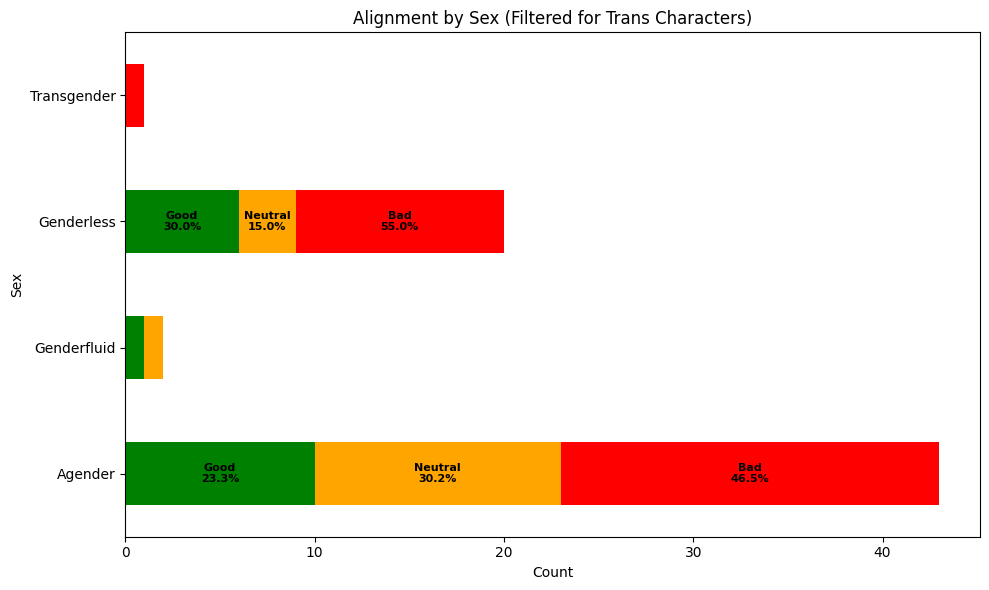

In [15]:
print("I am going to show the non-binary genders separately, as I couldn't figure out a good way to do it with Male and Female")

# create a copy
df_trans = df.copy()
# create a clean Sex column
df_trans = df_trans[(df_trans['sex'] == 'Transgender') | (df_trans['sex'] == 'Genderless') | (df_trans['sex'] == 'Genderfluid') | (df_trans['sex'] == 'Agender')]
df_trans['sex'] = df_trans['SEX'].str.replace(' Characters', '', regex=False)
# remap the alignment names
df_trans['alignment'] = df_trans['ALIGN'].map(alignment_mapping)

# Pair down the alignments to the filtered data set
available_alignments_trans = df_trans['alignment'].unique()  # Get unique alignments from the data
alignment_order_trans = [align for align in alignment_order if align in available_alignments_trans]

# Create align_counts, ensuring the columns are in the correct order
align_counts_trans = df_trans.groupby(['sex', 'alignment']).size().unstack(fill_value=0)[alignment_order_trans]

# Get the color list in the desired order
color_order = [alignment_colors[align] for align in align_counts_trans.columns]

# Get the color list in the correct order for the plot
color_order = [alignment_colors[align] for align in align_counts_trans.columns]
# Create the axis
ax = align_counts_trans.plot(kind='barh', stacked=True, figsize=(10, 6), color=color_order)
# Set the labels
plt.xlabel('Count')
plt.ylabel('Sex')
plt.title('Alignment by Sex (Filtered for Trans Characters)')

# Put commas in the x labels
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.get_legend().remove()
# Iterate over each bar segment and put the Alignment and % in the segment
for i in range(len(align_counts_trans.index)):
    bottom = 0
    for j, alignment in enumerate(align_counts_trans.columns):
        total = align_counts_trans.iloc[i].sum()  # Get the total count for the current sex
        width = align_counts_trans.iloc[i, j]
        if width > 1:
            percentage = (width / total) * 100  # Calculate percentage
            x_pos = bottom + width / 2
            y_pos = i
            ax.text(
                x_pos,
                y_pos,
                f"{alignment}\n{percentage:.1f}%",  # Add percentage to label
                ha='center',
                va='center',
                fontsize=8,
                color='black',
                weight='bold'
            )
        bottom += width
plt.tight_layout()
plt.show()

I much prefer the above visual to the exact requirement of the assignment. Following is the exact requirement:


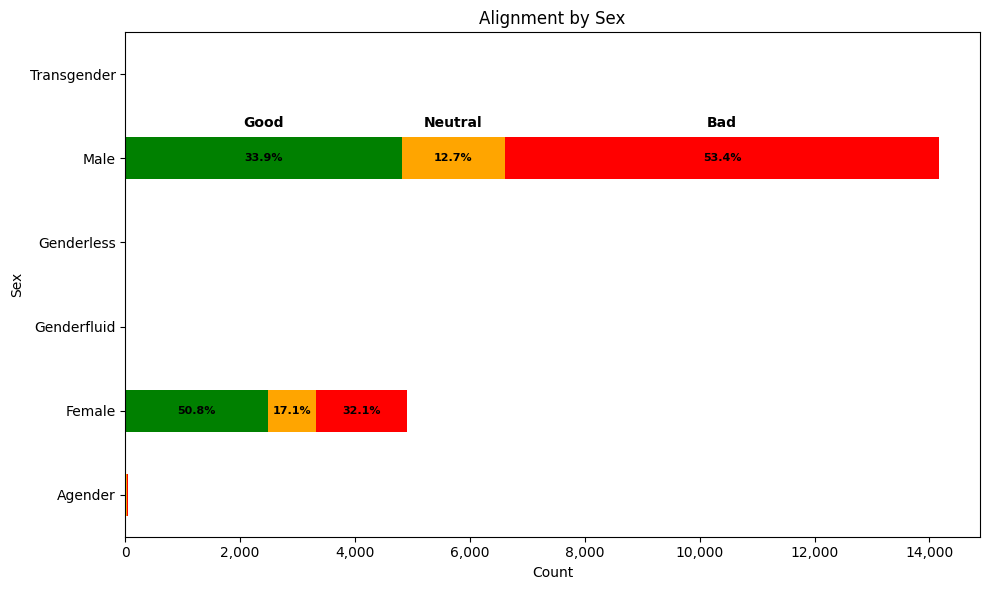

In [9]:
print("I much prefer the above visual to the exact requirement of the assignment. Following is the exact requirement:")
# Create the axis
ax = align_counts.plot(kind='barh', stacked=True, figsize=(10, 6), color=color_order)
# Set the labels
plt.xlabel('Count')
plt.ylabel('Sex')
plt.title('Alignment by Sex')

# Put commas in the x labels
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.get_legend().remove()
# Iterate over each bar segment and put the Alignment and % in the segment
for i in range(len(align_counts.index)):
    bottom = 0
    for j, alignment in enumerate(align_counts.columns):
        total = align_counts.iloc[i].sum()  # Get the total count for the current sex
        width = align_counts.iloc[i, j]
        if width > 100:
            percentage = (width / total) * 100  # Calculate percentage
            x_pos = bottom + width / 2
            y_pos = i
            ax.text(
                x_pos,
                y_pos,
                f"{percentage:.1f}%",  # Add percentage to label
                ha='center',
                va='center',
                fontsize=8,
                color='black',
                weight='bold'
            )
        bottom += width
        
        # Add alignment labels above the first bar ONLY
    if align_counts.index[i] == 'Male':  # Check if it's the first sex (index 0)
        top_offset = 5  # Adjust this value to control how high above the bars the labels appear
        for j, alignment in enumerate(align_counts.columns):
            width = align_counts.iloc[i, j]
            if width > 0 and alignment != 'Reformed':
                x_pos = width/2 + sum(align_counts.iloc[i,:j])
                ax.text(
                  x_pos,
                  4.5,  # Position above the first bar
                  alignment,
                  ha='center',
                  va='top',  # Align to the bottom so it's above the bar
                  fontsize=10,
                  color='black',
                  weight='bold'
                )
            
        bottom += width
plt.tight_layout()
plt.show()

### Problem 2: Recreate a visualization

Use the provided data to recreate another of the visualizations in the [article](https://fivethirtyeight.com/features/women-in-comic-books/). Ensure that colors and axis labels of the re-created visualization align with the original. Be clear about which visualization you are recreating.

I am recreating the LGBT Characters Bar Chart; Trans characters by Year


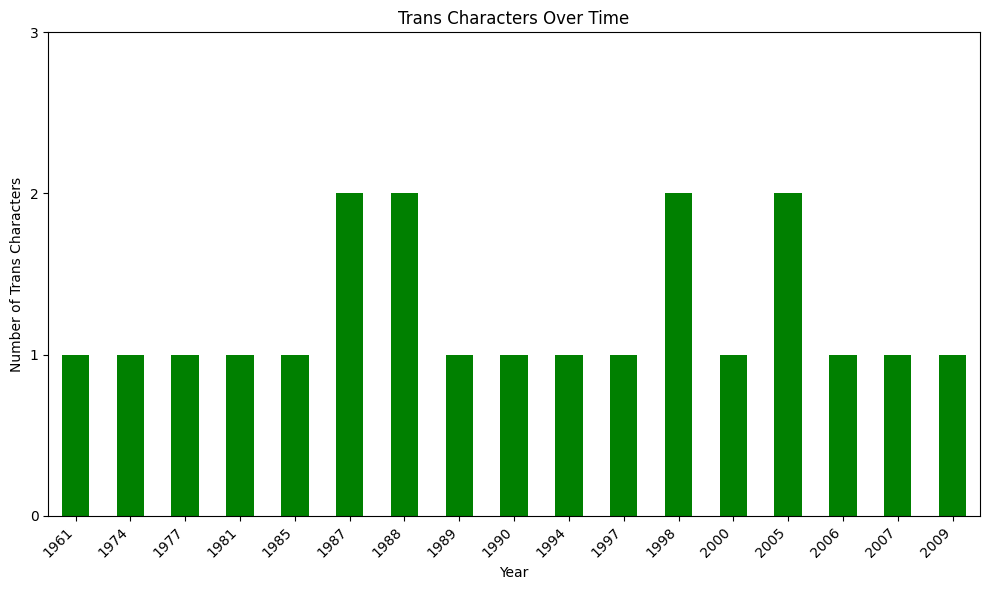

In [10]:
print("I am recreating the LGBT Characters Bar Chart; Trans characters by Year")
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x)}'))

# Group by year and count
trans_counts = df_trans.groupby('YEAR').size()

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = trans_counts.plot(kind='bar', color='green')

plt.xlabel('Year')
plt.ylabel('Number of Trans Characters')
plt.title('Trans Characters Over Time')

# Convert x and y axis to integers
ax.set_xticks(range(len(trans_counts.index)))  # Set integer ticks
ax.set_xticklabels(trans_counts.index.astype(int)) # Set integer labels
ax.set_yticks(range(0, trans_counts.max() + 2)) # Example: ticks every 2 units, adjust as needed

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Problem 3: Reflect

After producing your own visualization, comment on your ability to recreate the visual from the article exactly. Are there places where you see discrepancies? Why might this be the case? Do you need any additional information not present in the article to be able to do this

In [11]:
print("The data looks really sparse, so I am going do some profiling to see what is wrong")
# Get a smaller df with just the columns I want to look at
df_trans = df_trans[['sex', 'YEAR', 'Year']]
display(df_trans)

The data looks really sparse, so I am going do some profiling to see what is wrong


,sex,YEAR,Year
796,Genderless,1961.0,NaN
905,Genderless,1985.0,NaN
906,Genderless,1981.0,NaN
920,Genderless,1988.0,NaN
1122,Genderless,1987.0,NaN
...,...,...,...
15246,Agender,NaN,NaN
15247,Agender,NaN,NaN
15385,Agender,NaN,1969.0
15493,Agender,NaN,1978.0


In [12]:
print("It looks like there is a lot of bad data in the YEAR column")
# Count where the year is NA
na_count = df_trans['YEAR'].isna().sum()
if na_count > 0:
    print(f"The YEAR data is bad in the data set for {na_count} out of {len(df_trans)} rows.")  # More informative message
else:
    print("The year data is complete.")

It looks like there is a lot of bad data in the YEAR column
The YEAR data is bad in the data set for 47 out of 68 rows.


In [13]:
# So let's combine the two YEAR and Year columns
df_trans['year'] = df_trans['YEAR'].fillna(df_trans['Year'])
na_count = df_trans['year'].isna().sum()
if na_count > 0:
    print(f"The year data is bad in the data set for {na_count} out of {len(df_trans)} rows.")  # More informative message
else:
    print("The year data is complete.")

The year data is bad in the data set for 9 out of 68 rows.


We have significantly reduced the bad data, so let's redraw the chart (looks much better)


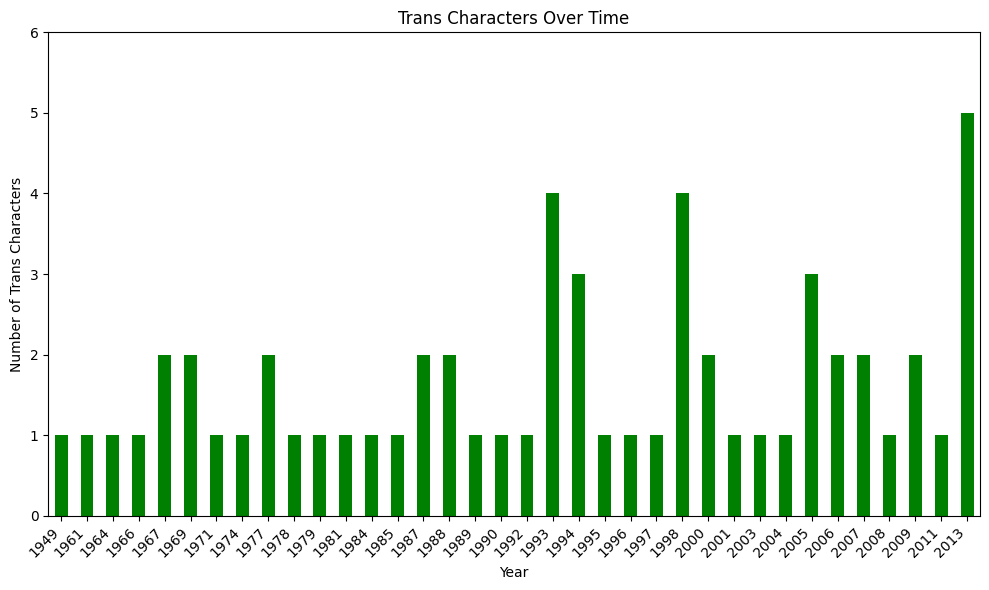

In [14]:
print("We have significantly reduced the bad data, so let's redraw the chart (looks much better)")
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x)}'))

# Remove rows with NaN values in 'year'
df_trans = df_trans[df_trans['year'].notna()]  

# Group by year and count
trans_counts = df_trans.groupby('year').size()

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = trans_counts.plot(kind='bar', color='green')

plt.xlabel('Year')
plt.ylabel('Number of Trans Characters')
plt.title('Trans Characters Over Time')

# Convert x and y axis to integers
ax.set_xticks(range(len(trans_counts.index)))  # Set integer ticks
ax.set_xticklabels(trans_counts.index.astype(int)) # Set integer labels
ax.set_yticks(range(0, trans_counts.max() + 2)) # Example: ticks every 2 units, adjust as needed

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()